In [2]:
import numpy as np
import math
#import healpy as hp
import pyfits
import matplotlib.pyplot as plt
from astropy.io import fits

%pylab inline

from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

from scipy import fftpack
import pyfits
import numpy as np
import pylab as py


Populating the interactive namespace from numpy and matplotlib


IOError: [Errno 2] No such file or directory: 'style.css'

In [3]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof


<matplotlib.colorbar.Colorbar instance at 0xf5649e0>

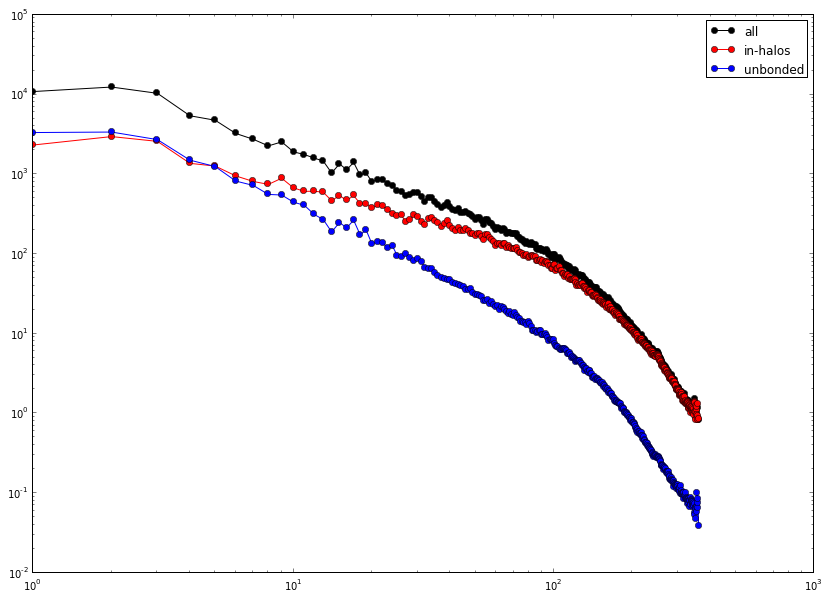

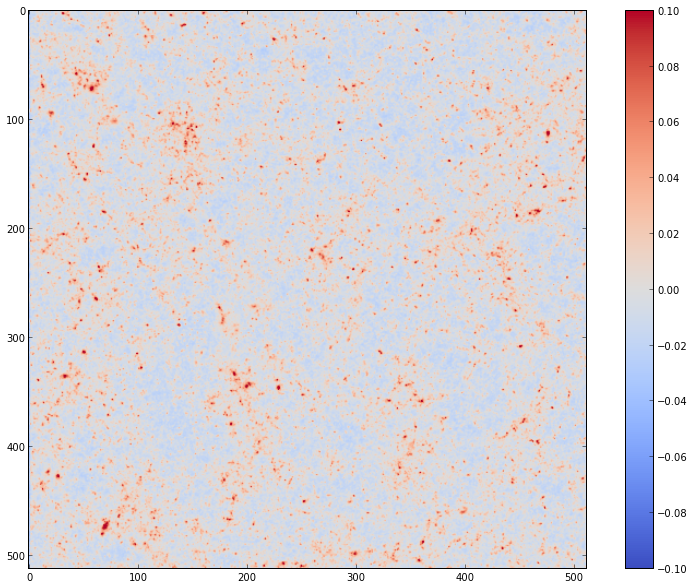

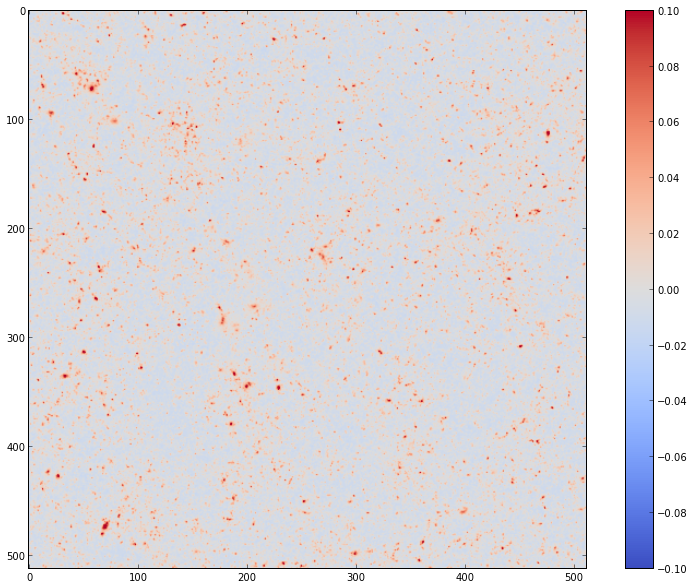

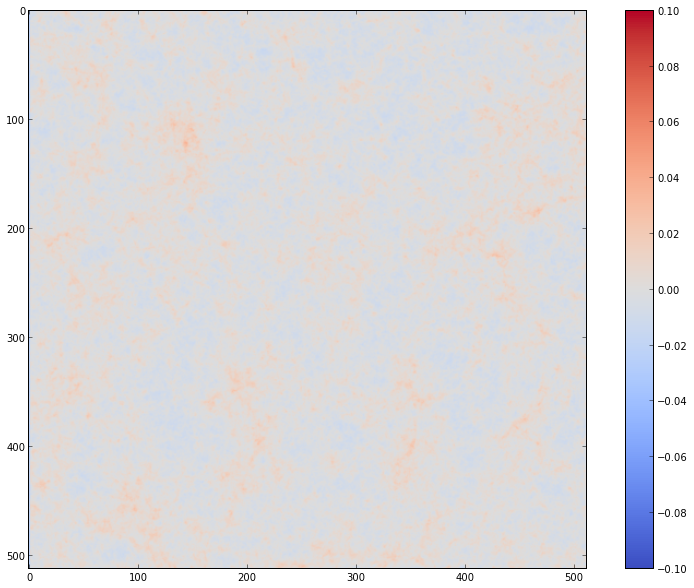

In [35]:
image=np.fromfile('../projects/kappa_patch/eff_kappa_normal_0.bin', dtype="<f")
image0=image.reshape(512,512)

F1 = fftpack.fft2(image0)
F2 = fftpack.fftshift( F1 )
psd2D = np.abs( F2 )**2
psd1D = azimuthalAverage(psd2D)

figure(figsize=(14,10))
plot(psd1D,'ko-',label='all')
xscale('log')
yscale('log')

image=np.fromfile('../projects/kappa_patch/eff_kappa_normal_1.bin', dtype="<f")
image1=image.reshape(512,512)

F1 = fftpack.fft2(image1)
F2 = fftpack.fftshift( F1 )
psd2D = np.abs( F2 )**2
psd1D = azimuthalAverage(psd2D)

plot(psd1D,'ro-',label='in-halos')

image=np.fromfile('../projects/kappa_patch/eff_kappa_normal_2.bin', dtype="<f")
image2=image.reshape(512,512)

F1 = fftpack.fft2(image2)
F2 = fftpack.fftshift( F1 )
psd2D = np.abs( F2 )**2
psd1D = azimuthalAverage(psd2D)

plot(psd1D,'bo-',label='unbonded')
legend()



figure(figsize=(14,10))
py.imshow( image0 , cmap=py.cm.coolwarm)
clim(-0.1,0.1)
colorbar()

figure(figsize=(14,10))
py.imshow( image1 , cmap=py.cm.coolwarm)
clim(-0.1,0.1)
colorbar()

figure(figsize=(14,10))
py.imshow( image2 , cmap=py.cm.coolwarm)
clim(-0.1,0.1)
colorbar()

#figure(figsize=(14,10))
#py.imshow( psd2D , cmap=py.cm.coolwarm)
#colorbar()

